<h2 align="center"> SEISMIC INVERSION AND AVO ANALYSIS </h3>
<h3 align="center"> RICKER WAVELET AND SEISMIC TRACES </h3>

<h3> STUDENT: MASAPANTA POZO, John </h3>

Sunday, 22th November, 2020\
Stavanger-Norway

***The following scrib was developed considering the following statement:***

<p style='text-align: justify;'> 

**Problem:**

**I & II.** Program a modelling algorithm to compute a seismic trace representing the normal incidence primary reflections from the top and base of the reservoir model defined above. The amplitudes are defined by the computed reflection coefficients. Convolve with a Ricker wavelet with 25Hz and 2 ms sampling interval. Plot the seismic trace.

**III.** Extend the algorithm above to model a seismic section with locations with varying reservoir thicknesses. Let the top reservoir be at 2.05 s for all locations, while the base reservoir is dipping with 2 ms for each location. At location/trace 1 the reservoir thickness is 0, and there are no reflection coefficients in this trace. At location/trace 2, the reservoir thickness is 2 ms, and so on. Plot the seismic section. Interpret the top and base reservoir. Comment What happens with the amplitude along the seismic line?

</p>

### I. WAVELET CREATION

**RICKER WAVELET DEFINITION**\

A Ricker wavelet can be defined as follow:

t         = Time series [s]\
w(t) = (1 - 2*(-pi * t * f)^2) * exp((-pi * t * f)^2)

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#INPUT for the Ricker Wavelet Function

#nt             = Number of samples
#dt             = Sampling density in sec
#main_frequency = Center frequency in Hz
#t_0            = Time for center sample (peak) in sec.\
                  #Default is center output trace: t_0 = (nt-1)/2 * dt

#Creating the Ricker Wavelet Function

def Ricker_wavelet(nt, dt, main_frequency):
    tmax = (nt-1) * dt
    t = np.arange(-tmax/2, tmax/2, dt)
    arg = (np.pi * main_frequency * t)**2
    w = (1  - 2*arg) * np.exp(-arg)
    return t, w


In [3]:
#Displaying a Ricker wavelet with frequency  = 25[Hz] and sampling interval = 2[ms]

wavelet1  = Ricker_wavelet(nt = 41, dt = 0.002, main_frequency = 25)
#display(wavelet1)

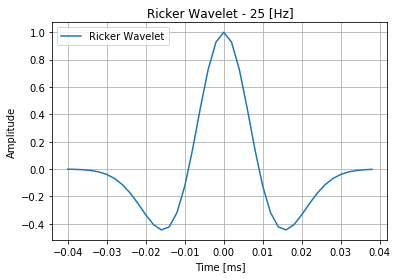

In [4]:
#Ploting wavelet

plt.plot(wavelet1[0], wavelet1[1])
plt.xlabel('Time [ms]'); plt.ylabel('Amplitude'); plt.title('Ricker Wavelet - 25 [Hz]')
plt.legend(["Ricker Wavelet"], loc = 'upper left')
plt.grid(True)
plt.show()


### II. SINGLE SEISMIC TRACE

FOR THE TARGET TIME WINDOW OR RESERVOIR INTERVAL WHICH IS INCLUDED IN THE INTERVAL FROM 2.0 TO 2.2 ms, THE NUMBER OF SAMPLES WILL BE DEFINED AS FOLLOW:
    
    Number of samples = 1 + [(T_bottom - T_top)*1000/dt]
    Number of samples = 101
    

In [5]:
#Defining a Sample number function
def Sample_number(t_base, T_top, dt):
    sample_num = 1 +((t_base - T_top)/dt)
    return(round(sample_num))

#Number of samples in the interval considering dt = 2[ms]
Initial_interv_time = 2.0
Final_interv_time = 2.2
dt = 0.002

number_samples = Sample_number(Final_interv_time, Initial_interv_time, dt)
#print(number_samples)

top_loc = Sample_number(2.05, 2.0, dt)          #Sample number (location) for the Top of the reservoir
#print(top_loc)

base_loc = Sample_number(2.15, 2.0, dt)        #Sample number (location) for the Base of the reservoir
#print(base_loc)

In [6]:
#Reflection Coeficient for the top and base
RC_top = -0.07975
RC_base = 0.07975

RC_series = np.zeros(number_samples)
RC_series[top_loc] = RC_top
RC_series[base_loc] = RC_base
#print(RC_series)

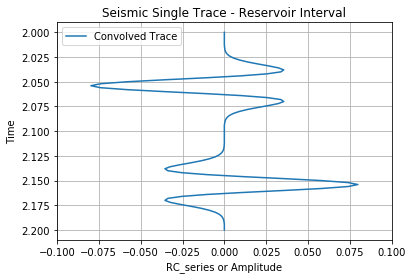

In [7]:
t, w  = Ricker_wavelet(nt = 41, dt = 0.002, main_frequency = 25)         #Ricker wavelet
synthetic = np.convolve(w, RC_series, mode='same')                       #Convolving the wavelet and the RC_series
time = np.arange(Initial_interv_time, Final_interv_time, dt)             #Resampling the time for plotting the seismic trace
#print(synthetic)

#Ploting Seismic Trace
plt.plot(synthetic, time)
plt.xlabel('RC_series or Amplitude'); plt.ylabel('Time'); plt.title('Seismic Single Trace - Reservoir Interval')
plt.legend(["Convolved Trace"], loc = 'upper left')
plt.xlim([-0.1,0.1])
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### III. MULTIPLE SEISMIC TRACES

Note that RC_series or synthetics only have 101 spaces to move across where you may place the RC for the top and base of the reservoir.

Therefore, **top_loc + i must not be bigger than 101.** 

And since top_loc is 26, hence **i (or number traces when it comes to the for loop) should be less or equal to 75.**


In [8]:
top_loc = Sample_number(2.05, 2.0, dt)          #Sample number (location) for the Top of the reservoir
base_loc = Sample_number(2.15, 2.0, dt)
num_traces = 30                                 #SEE NOTE DESCRIBED BEFORE!!!

t, w  = Ricker_wavelet(nt = 41, dt = 0.002, main_frequency = 25)         #Ricker wavelet for convolving

ref = []                                                #Reflection Coefficients Matrix
traces_series = []                                      #Convolved Seismic Traces Matrix
for i in range(num_traces):
    RC_series = np.zeros(number_samples)                #Since 2 ms in time means 1 position in the RC series we end up as follow:
    RC_series[top_loc] = RC_top
    RC_series[top_loc+i] = RC_base                      #Here we use the top_loc intead of the base_loc since we are assuming that at trace[0] the thickness is 0 and therefore RC = 0.
    
    synthetic = np.convolve(w, RC_series, mode='same')  #Convolved Traces
    
    traces_series.append(synthetic)
    ref.append(RC_series)

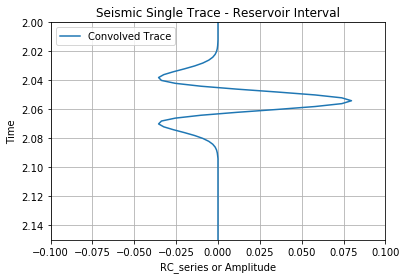

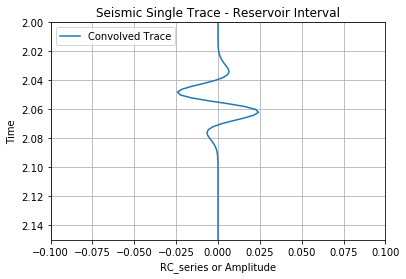

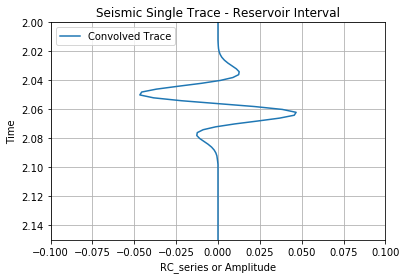

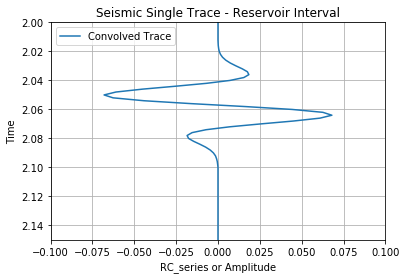

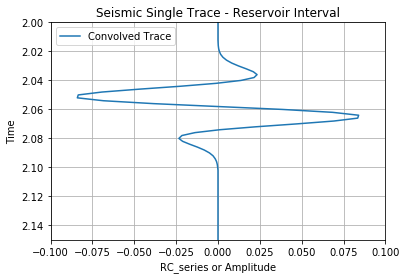

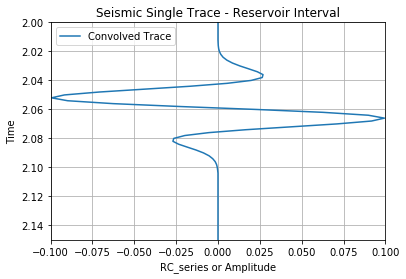

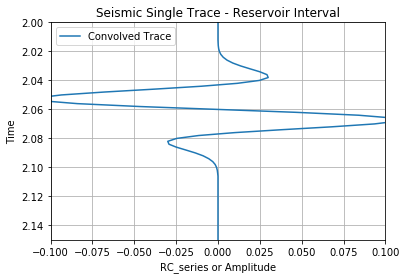

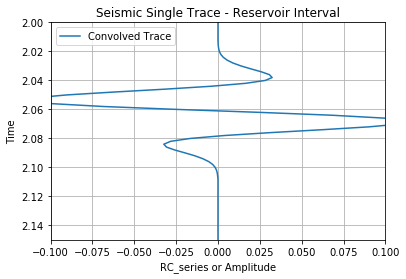

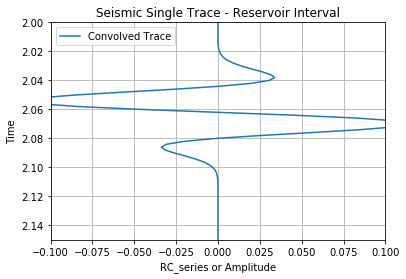

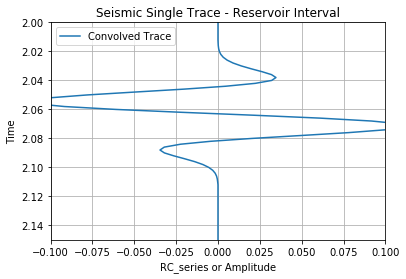

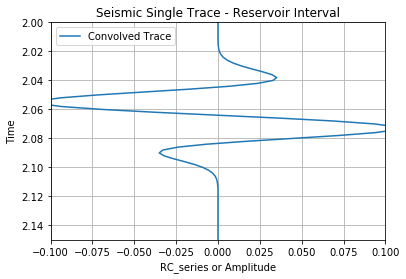

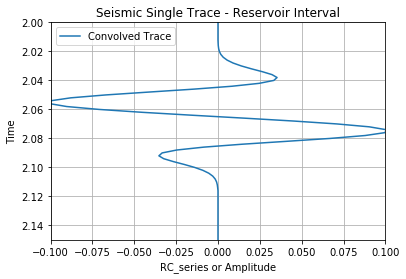

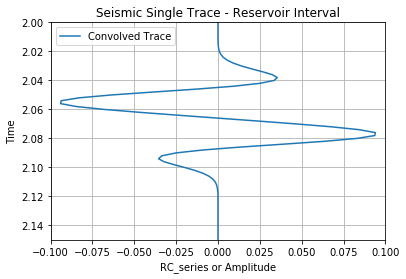

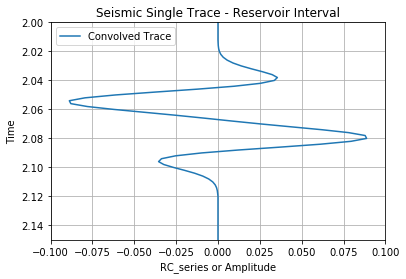

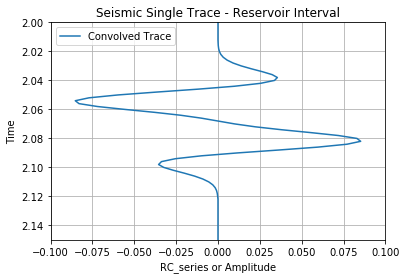

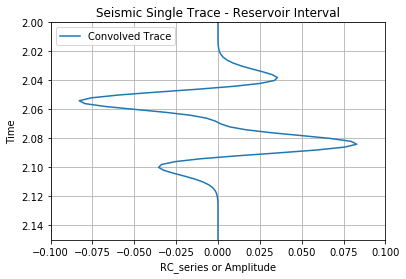

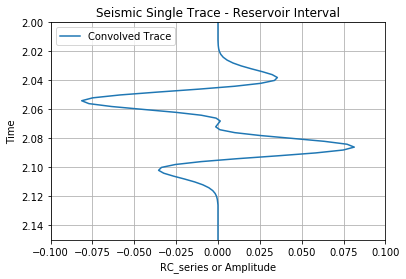

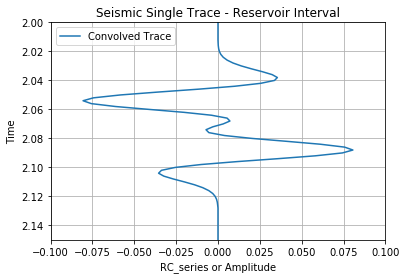

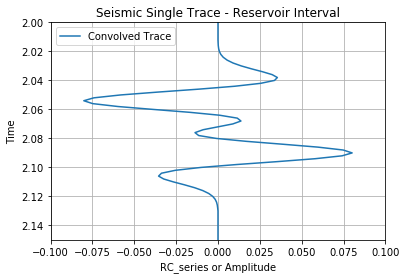

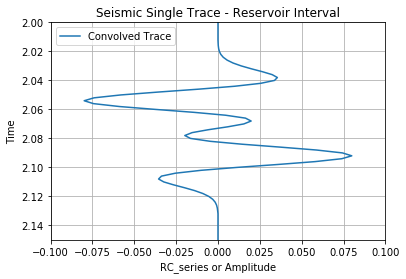

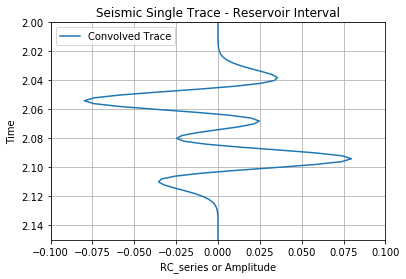

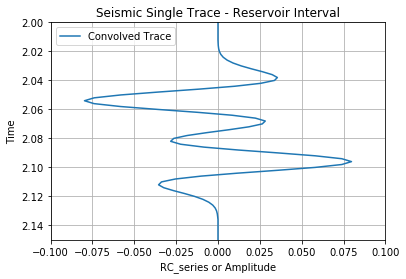

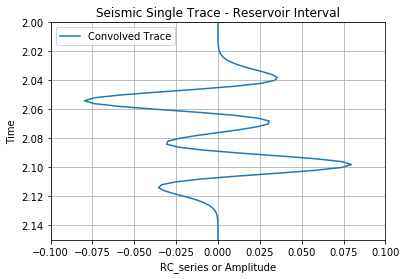

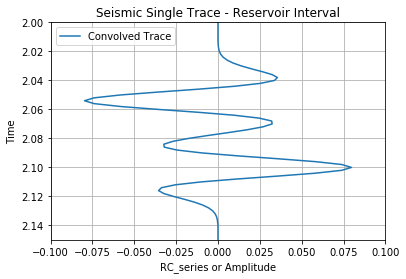

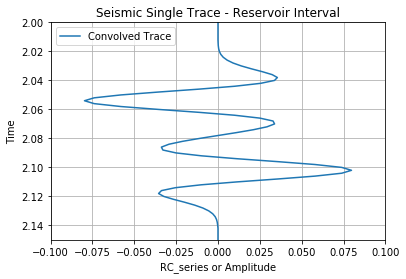

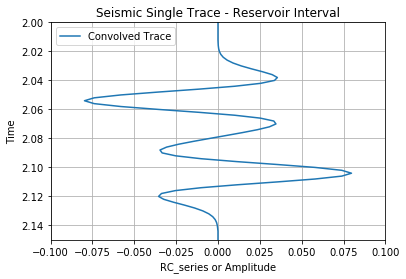

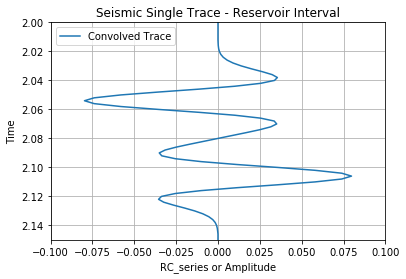

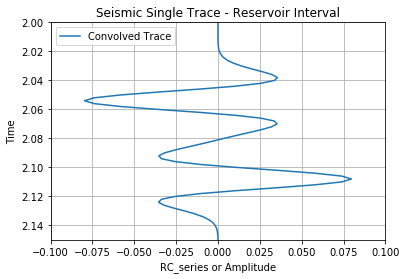

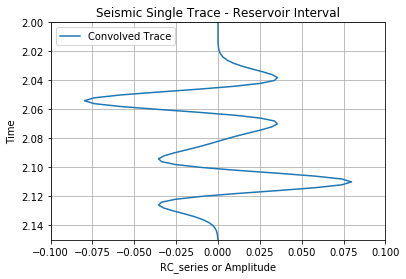

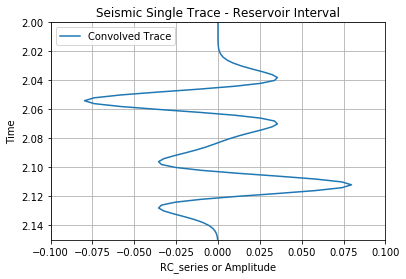

In [9]:
#Ploting Seismic Traces separately
for i in range(num_traces):
    plt.plot(traces_series[i], time)
    plt.xlabel('RC_series or Amplitude'); plt.ylabel('Time'); plt.title('Seismic Single Trace - Reservoir Interval')
    plt.legend(["Convolved Trace"], loc = 'upper left')
    plt.xlim([-0.1,0.1])
    plt.ylim([2,2.15])
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


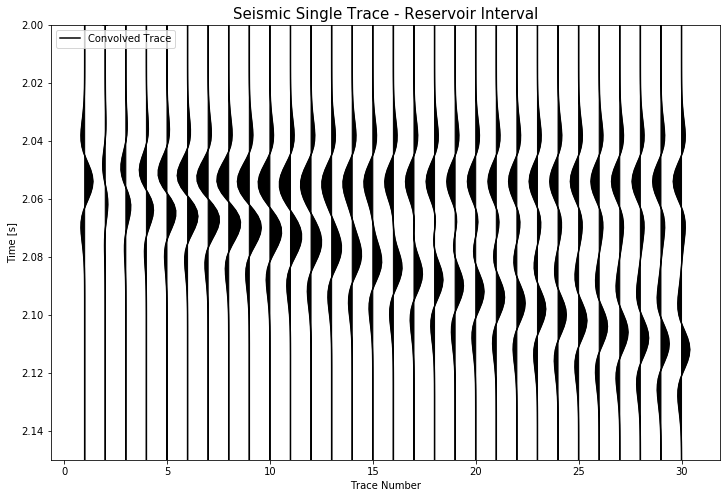

NOTE: The amplitudes have been multiplied by 5 in this plot to make them more visible (scale increment by 5).


In [10]:
#Ploting Seismic Traces Together
traces = np.linspace(1,num_traces,num_traces)
traces = np.linspace(1,num_traces,num_traces)

plt.figure(figsize=(12,8))
for i in range(num_traces):
    new_trace = traces_series[i]*5+traces[i]
    plt.plot(new_trace, time, color="black")
    plt.xlabel('Trace Number', size = 10); plt.ylabel('Time [s]', size = 10); plt.title('Seismic Single Trace - Reservoir Interval', size = 15)
    plt.legend(["Convolved Trace"], loc = 'upper left')
    plt.ylim([2.0,2.15])
    #plt.fill_between(new_trace, traces[i], time, where=(new_trace<traces[i]), color = "red")
    #plt.fill_between(new_trace, traces[i], time, where=(new_trace>traces[i]), color = "blue")
    plt.fill_between(new_trace, traces[i], time, color = "black")
    
    plt.gca().invert_yaxis()
#plt.grid(True)
plt.show()
print("NOTE: The amplitudes have been multiplied by 5 in this plot to make them more visible (scale increment by 5).")

Text(0, 0.5, 'Time Sample Location')

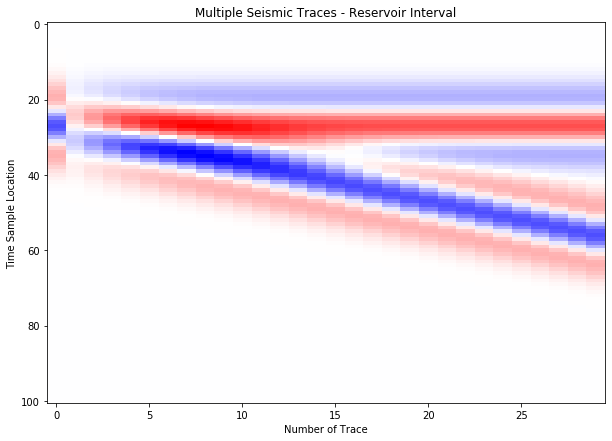

In [11]:
#Plotting the sesmic traces together - color map
ref_new = np.asarray(ref).T
traces_series_new = np.asarray(traces_series).T

plt.figure(figsize=(10,7))
plt.imshow(traces_series_new, aspect="auto", cmap="bwr_r")
plt.title('Multiple Seismic Traces - Reservoir Interval')
plt.xlabel('Number of Trace')
plt.ylabel('Time Sample Location')


### III. AMPLITUDE ANALYSIS FOR TOP AND BASE

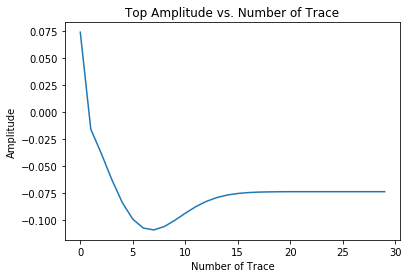

In [12]:
#Plotting the amplitude for the Top of the reservoir

amp_top = traces_series_new[top_loc,:]                             #Ploting the trace amplitudes by location -  row = number samples // column = trace 
plt.plot(amp_top)
plt.xlabel('Number of Trace'); plt.ylabel('Amplitude'); plt.title("Top Amplitude vs. Number of Trace")
plt.show()

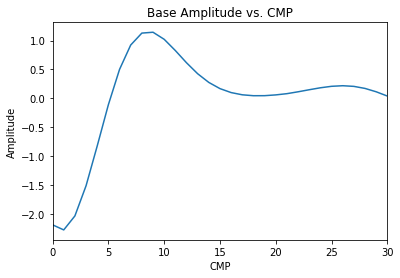

In [13]:
#Plotting the amplitude for the Base of the reservoir

#Here I need to sum up the traces to see how the amplitude changes, IN OTHER WORDS I need to create a CMP GATHER
result = np.zeros(number_samples)  
for i in range(num_traces):
    result = result + traces_series[i]

amp_base = result[top_loc: top_loc+number_samples]  #Ploting the trace amplitudes by location - (row = trace // column = number samples)
plt.plot(amp_base)
plt.xlabel('CMP'); plt.ylabel('Amplitude'); plt.title("Base Amplitude vs. CMP")
plt.xlim([0,30])
plt.show()
